#### NWchem-Qiskit Driver Code for batch evaluation 
##### bond distance from 1.3 to 13.7
##### number of virtual orbital use: 1, 4, 8, 12, 18

In [25]:
import os 
import sys
import yaml
import os
from qiskit_nature_qe import nwchem_driver
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit.exceptions import QiskitError
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD, UCC
import numpy as np
from nwchem2yaml import extract_fields
import matplotlib.pyplot as plt

##### Now fix number of virtual orbitals as 1 but change bond distance. 

In [26]:
data_dir_nwchem = os.path.join("qe_files", "3x3_periodic", "NWChem",'1covo')
data_dir_yaml = os.path.join("qe_files", "3x3_periodic", "NWChem",'1covo_yaml')
data_files = os.listdir(data_dir_nwchem)
bond_distances = []
vqe_energies = []
total_energies = []
for data_file in data_files:
    if data_file.find('out') == -1:
        continue
    temp = data_file.split('-')
    temp1 = temp[1].split('.')
    bond_distance = float(temp1[0] +'.'+ temp1[1])
    bond_distances.append(bond_distance)
    name = temp[0] + '-' + str(bond_distance)
    
    print("========= Bond distance: {} =========".format(bond_distance))
    data_file_yaml = os.path.join(data_dir_yaml, "{}.yaml".format(name))
    data = extract_fields(os.path.join(data_dir_nwchem,data_file))
    with open(data_file_yaml, 'w') as f:
        f.write(yaml.dump(data, default_flow_style=False)) 
    driver = nwchem_driver.NWchem_Driver(data_file_yaml)
    es_problem = driver.run()
    mapper = JordanWignerMapper()
    ansatz = UCCSD(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
        initial_state=HartreeFock(
            es_problem.num_spatial_orbitals,
            es_problem.num_particles,
            mapper,
        ),
    )
    vqe_solver = VQE(Estimator(), ansatz, SLSQP())
    # vqe_solver.initial_point = [0.0] * ansatz.num_parameters
    vqe_solver.initial_point = np.random.rand(ansatz.num_parameters)
    calc = GroundStateEigensolver(mapper, vqe_solver)
    res = calc.solve(es_problem)
    ground_energy = res.eigenvalues[0] + es_problem.nuclear_repulsion_energy
    vqe_energies.append(ground_energy)
    total_energies.append(driver.total_energy)
    print('> Total energy from HF (Hartree):{}'.format(driver.total_energy))

========= Bond distance: 1.3 =========
h_ij up-down equal: True
eri up-down equal: True
eri up-(down-up) equal: False
eri (up-down)-(down-up) equal: True
> Total energy from HF (Hartree):-0.7267359408
========= Bond distance: 3.0 =========
h_ij up-down equal: True
eri up-down equal: True
eri up-(down-up) equal: False
eri (up-down)-(down-up) equal: True
> Total energy from HF (Hartree):-0.6808280113
========= Bond distance: 1.5 =========
h_ij up-down equal: True
eri up-down equal: True
eri up-(down-up) equal: False
eri (up-down)-(down-up) equal: True
> Total energy from HF (Hartree):-0.7426173191
========= Bond distance: 1.4 =========
h_ij up-down equal: True
eri up-down equal: True
eri up-(down-up) equal: False
eri (up-down)-(down-up) equal: True
> Total energy from HF (Hartree):-0.7368766551
========= Bond distance: 5.0 =========
h_ij up-down equal: True
eri up-down equal: True
eri up-(down-up) equal: False
eri (up-down)-(down-up) equal: True
> Total energy from HF (Hartree):-0.613477

In [30]:
total_energies = np.array(total_energies)
vqe_energies = np.array(vqe_energies)
bond_distances = np.array(bond_distances)

In [31]:
sorted_indices = np.argsort(bond_distances)
bond_distances = bond_distances[sorted_indices]
vqe_energies = vqe_energies[sorted_indices]
total_energies = total_energies[sorted_indices]

#### Here we plot data out. And the figure is almost as same as what they shown in COVO paper.

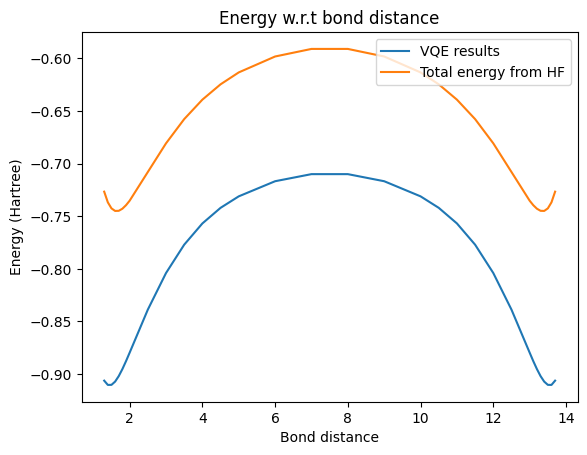

In [32]:
plt.plot(bond_distances, vqe_energies, label='VQE results')
plt.plot(bond_distances, total_energies, label='Total energy from HF')
plt.legend(loc=1)
plt.xlabel('Bond distance')
plt.ylabel('Energy (Hartree)')
plt.title('Energy w.r.t bond distance')
plt.show()

##### Now change number of virtual orbitals as well (Not ready yet)

In [39]:
covos = [1, 4, 8, 12, 18]
data_covos = {}
for covo in covos:
    data_dir_nwchem = os.path.join("qe_files", "3x3_periodic", "NWChem",'{}covo'.format(covo))
    data_dir_yaml = os.path.join("qe_files", "3x3_periodic", "NWChem",'{}covo_yaml'.format(covo))
    if not os.path.exists(data_dir_yaml):
        os.makedirs(os.path.join("qe_files", "3x3_periodic", "NWChem",'{}covo_yaml'.format(covo)))
    data_files = os.listdir(data_dir_nwchem)
    bond_distances = []
    vqe_energies = []
    total_energies = []
    for data_file in data_files:
        if data_file.find('out') == -1:
            continue
        temp = data_file.split('-')
        temp1 = temp[1].split('.')
        bond_distance = float(temp1[0] +'.'+ temp1[1])
        bond_distances.append(bond_distance)
        name = temp[0] + '-' + str(bond_distance)
        
        print("========= Bond distance: {} =========".format(bond_distance))
        data_file_yaml = os.path.join(data_dir_yaml, "{}.yaml".format(name))
        data = extract_fields(os.path.join(data_dir_nwchem,data_file))
        with open(data_file_yaml, 'w') as f:
            f.write(yaml.dump(data, default_flow_style=False)) 
        driver = nwchem_driver.NWchem_Driver(data_file_yaml)
        es_problem = driver.run()
        mapper = JordanWignerMapper()
        ansatz = UCCSD(
            es_problem.num_spatial_orbitals,
            es_problem.num_particles,
            mapper,
            initial_state=HartreeFock(
                es_problem.num_spatial_orbitals,
                es_problem.num_particles,
                mapper,
            ),
        )
        vqe_solver = VQE(Estimator(), ansatz, SLSQP())
        # vqe_solver.initial_point = [0.0] * ansatz.num_parameters
        vqe_solver.initial_point = np.random.rand(ansatz.num_parameters)
        calc = GroundStateEigensolver(mapper, vqe_solver)
        res = calc.solve(es_problem)
        ground_energy = res.eigenvalues[0] + es_problem.nuclear_repulsion_energy
        vqe_energies.append(ground_energy)
        total_energies.append(driver.total_energy)
        # print('> Total energy from HF (Hartree):{}'.format(driver.total_energy))
    data_covos[covo] = np.array([bond_distances, total_energies, vqe_energies])


========= Bond distance: 1.3 =========
h_ij up-down equal: True
eri up-down equal: True
eri up-(down-up) equal: False
eri (up-down)-(down-up) equal: True
========= Bond distance: 3.0 =========
h_ij up-down equal: True
eri up-down equal: True
eri up-(down-up) equal: False
eri (up-down)-(down-up) equal: True
========= Bond distance: 1.5 =========
h_ij up-down equal: True
eri up-down equal: True
eri up-(down-up) equal: False
eri (up-down)-(down-up) equal: True
========= Bond distance: 1.4 =========
h_ij up-down equal: True
eri up-down equal: True
eri up-(down-up) equal: False
eri (up-down)-(down-up) equal: True
========= Bond distance: 5.0 =========
h_ij up-down equal: True
eri up-down equal: True
eri up-(down-up) equal: False
eri (up-down)-(down-up) equal: True
========= Bond distance: 7.0 =========
h_ij up-down equal: True
eri up-down equal: True
eri up-(down-up) equal: False
eri (up-down)-(down-up) equal: True
========= Bond distance: 1.6 =========
h_ij up-down equal: True
eri up-down 

IndexError: index 2 is out of bounds for axis 0 with size 2